## Product Sales Effectiveness FicZon Inc.

In [100]:
import mysql.connector
import pandas as pd
import numpy as np


In [101]:
## making connections to database server

connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')



In [102]:
## Check the number of databases available on the server

cursor=connection.cursor() 
cursor.execute('show databases') 
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [103]:
## connecting the database  
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')


In [104]:
# view tables present in project_sales db

db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [105]:
# Select all the fields available in the project_sale table.

query = "select * from data"  
data = pd.read_sql(query,connection)
print(data.shape)
data



(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [106]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [107]:
#to check any NaN values
data.isnull().sum()                    

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [108]:
# target,output categories counts
data['Status'].value_counts()             

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [109]:
#features counts seperately
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [110]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [111]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [112]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [113]:
#EDA

In [115]:
# remove unwanted features which are not related to output

In [116]:
data.drop(['Mobile','EMAIL'],axis=1,inplace=True)

In [117]:
# date,time needs to set in the right form to do further analysis

In [118]:
data['Created']=pd.to_datetime(data.Created)

In [119]:
data.head(2)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open


In [120]:

#to create new columns from date-time  for day,month,year,hour,minute,weekday etc....to get more accurate results

In [121]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [122]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,10,5
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,22
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,21
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,8,46
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,7,34


In [123]:
data.drop(['Created'],axis=1,inplace=True)          #use & throw

In [124]:

data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,10,5
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,22
2,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,21
3,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,8,46
4,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,7,34


In [125]:
from collections import Counter            #import all packages to be needed
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

In [126]:
#we have some empty fields , no more, around 1-2%, just delete those rows

In [127]:
data.drop(data[data['Product_ID']==''].index,inplace=True)
data.drop(data[data['Location']==''].index,inplace=True)
data.drop(data[data['Source']==''].index,inplace=True)
data.drop(data[data['Delivery_Mode']==''].index,inplace=True)
data.drop(data[data['Sales_Agent']==''].index,inplace=True)
data.drop(data[data['Day']==''].index,inplace=True)
data.drop(data[data['Month']==''].index,inplace=True)
data.drop(data[data['Weekday']==''].index,inplace=True)
data.drop(data[data['Hour']==''].index,inplace=True)
data.drop(data[data['Minute']==''].index,inplace=True)
data.drop(data[data['Status']==''].index,inplace=True)

In [128]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11,1,18,51
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11,1,18,48
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11,1,17,9
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11,1,16,49
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11,1,16,37
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,5,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,5,9,43
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,5,9,20
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,5,8,4


In [129]:
# rearrage the column for standard

In [130]:
data=data.reindex(columns=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Day','Month','Weekday','Hour','Minute','Status'])
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,Bangalore,Live Chat-Google Organic,Mode-1,Sales-Agent-3,13,11,1,18,51,Potential
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,1,18,48,Potential
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,1,17,9,Potential
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,1,16,49,Not Responding
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,1,16,37,In Progress Positive
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Mumbai,Call,Mode-4,Sales-Agent-6,28,4,5,9,45,LOST
7418,15,Other Locations,Call,Mode-5,Sales-Agent-12,28,4,5,9,43,LOST
7419,5,Bangalore,Live Chat-Direct,Mode-1,Sales-Agent-11,28,4,5,9,20,Not Responding
7420,21,Other Locations,CRM form,Mode-1,Sales-Agent-4,28,4,5,8,4,Just Enquiry


In [131]:
# Univariative analysis
data['Product_ID'].value_counts()

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [132]:
data['Product_ID']=data['Product_ID'].astype('int64')           #to sure as an int types to show in plots

In [133]:
from sklearn.preprocessing import LabelEncoder               #Label Encoding
enc=LabelEncoder()
data.Source=enc.fit_transform(data.Source)
data.Sales_Agent=enc.fit_transform(data.Sales_Agent)
data.Location=enc.fit_transform(data.Location)
data.Delivery_Mode=enc.fit_transform(data.Delivery_Mode)

In [134]:
data.Status.value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [135]:
#lets convert into binary classification probs

In [136]:
# 0 -----> Low Potential   & 1-------> High Potential

In [137]:
data.Status[data['Status']=='Junk Lead']=0
data.Status[data['Status']=='Not Responding']=0
data.Status[data['Status']=='CONVERTED']=1
data.Status[data['Status']=='Just Enquiry']=1
data.Status[data['Status']=='Potential']=1
data.Status[data['Status']=='Long Term']=1
data.Status[data['Status']=='In Progress Positive']=1
data.Status[data['Status']=='In Progress Negative']=0
data.Status[data['Status']=='LOST']=0
data.Status[data['Status']=='Open']=1
data.Status[data['Status']=='converted']=1

C:\Users\Hasanthi\AppData\Local\Temp/ipykernel_1068/2696964943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Status[data['Status']=='Junk Lead']=0
C:\Users\Hasanthi\AppData\Local\Temp/ipykernel_1068/2696964943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Status[data['Status']=='Not Responding']=0
C:\Users\Hasanthi\AppData\Local\Temp/ipykernel_1068/2696964943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

In [138]:
data.Status=data['Status'].astype('int64')

In [139]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1
25,15,6,24,0,8,13,11,1,16,49,0
26,18,1,2,0,8,13,11,1,16,37,1
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,9,2,3,7,28,4,5,9,45,0
7418,15,10,2,4,2,28,4,5,9,43,0
7419,5,1,14,0,1,28,4,5,9,20,0
7420,21,10,1,0,5,28,4,5,8,4,1


In [140]:
data.Status.value_counts()

0    3715
1    3613
Name: Status, dtype: int64

<AxesSubplot:>

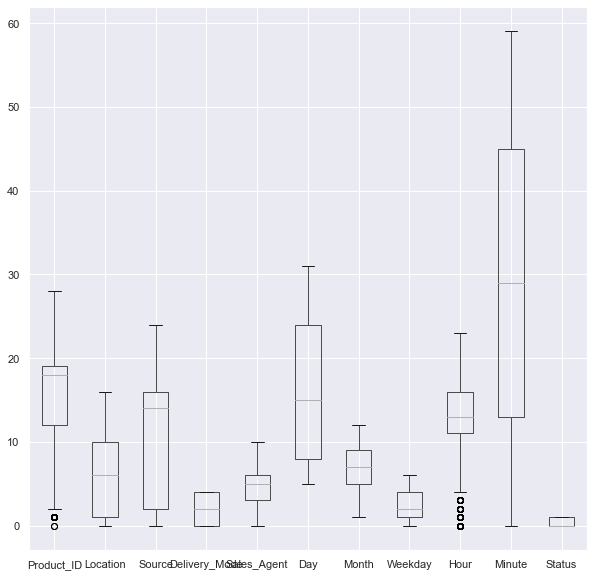

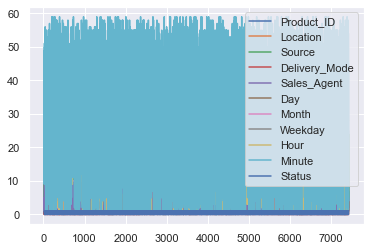

In [141]:
data.boxplot(figsize=(10,10))
data.plot()

<AxesSubplot:>

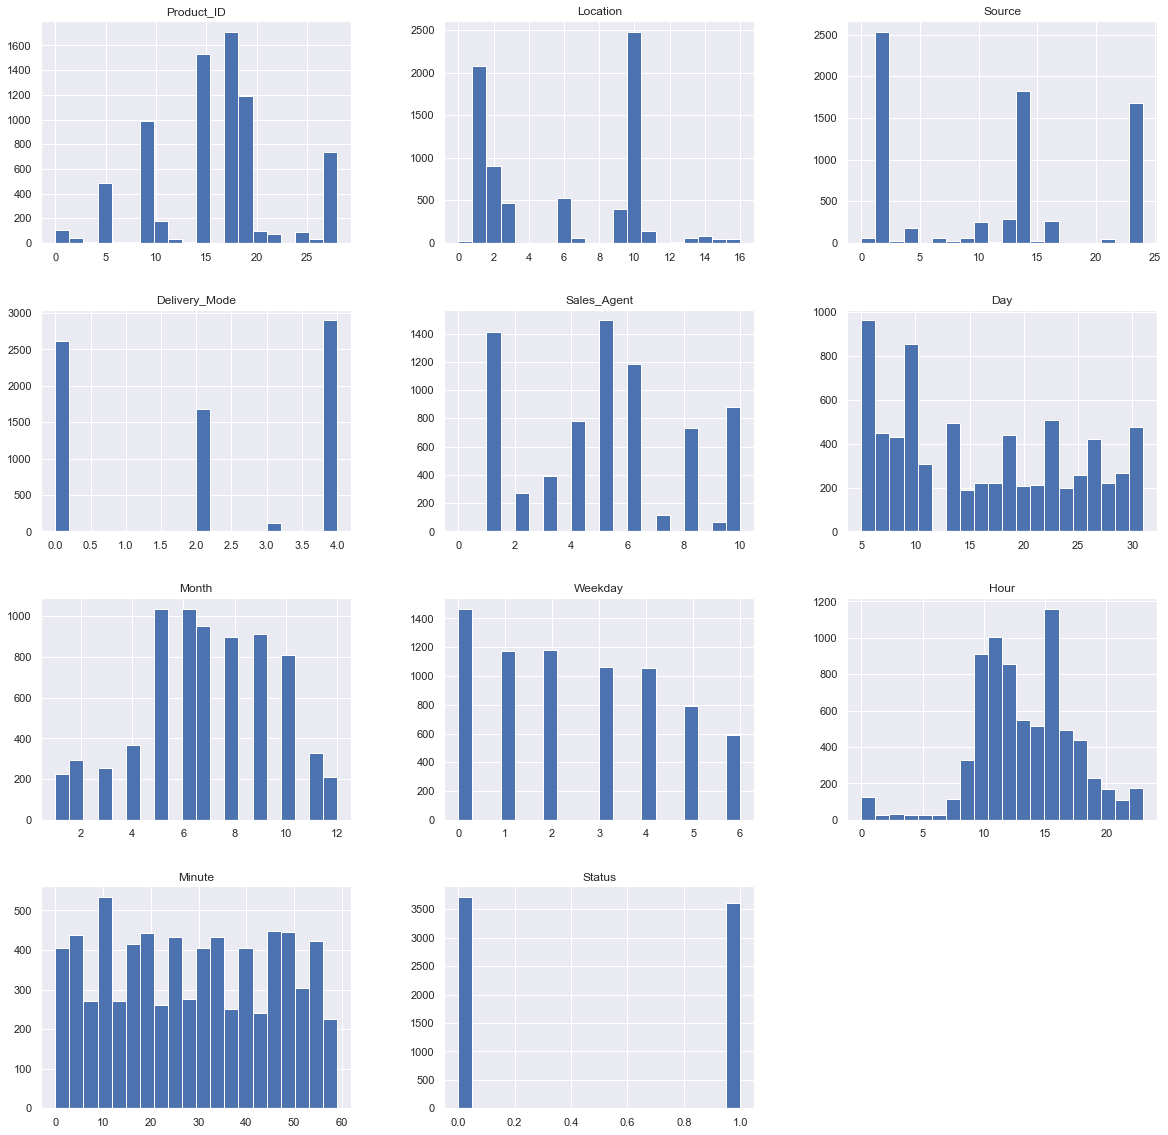

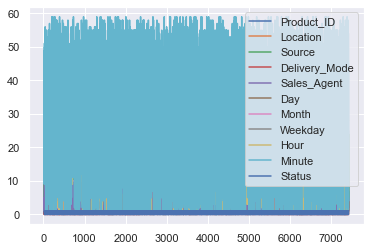

In [142]:
data.hist(bins=20,figsize=(20,20))
data.plot()

<AxesSubplot:>

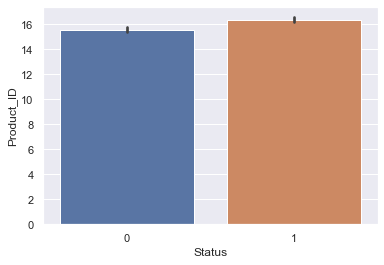

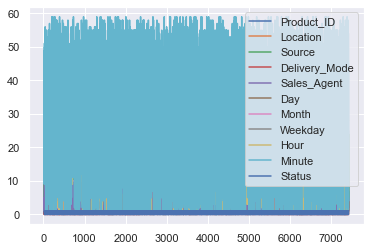

In [143]:
sb.barplot(x=data['Status'],y=data['Product_ID'])
data.plot()

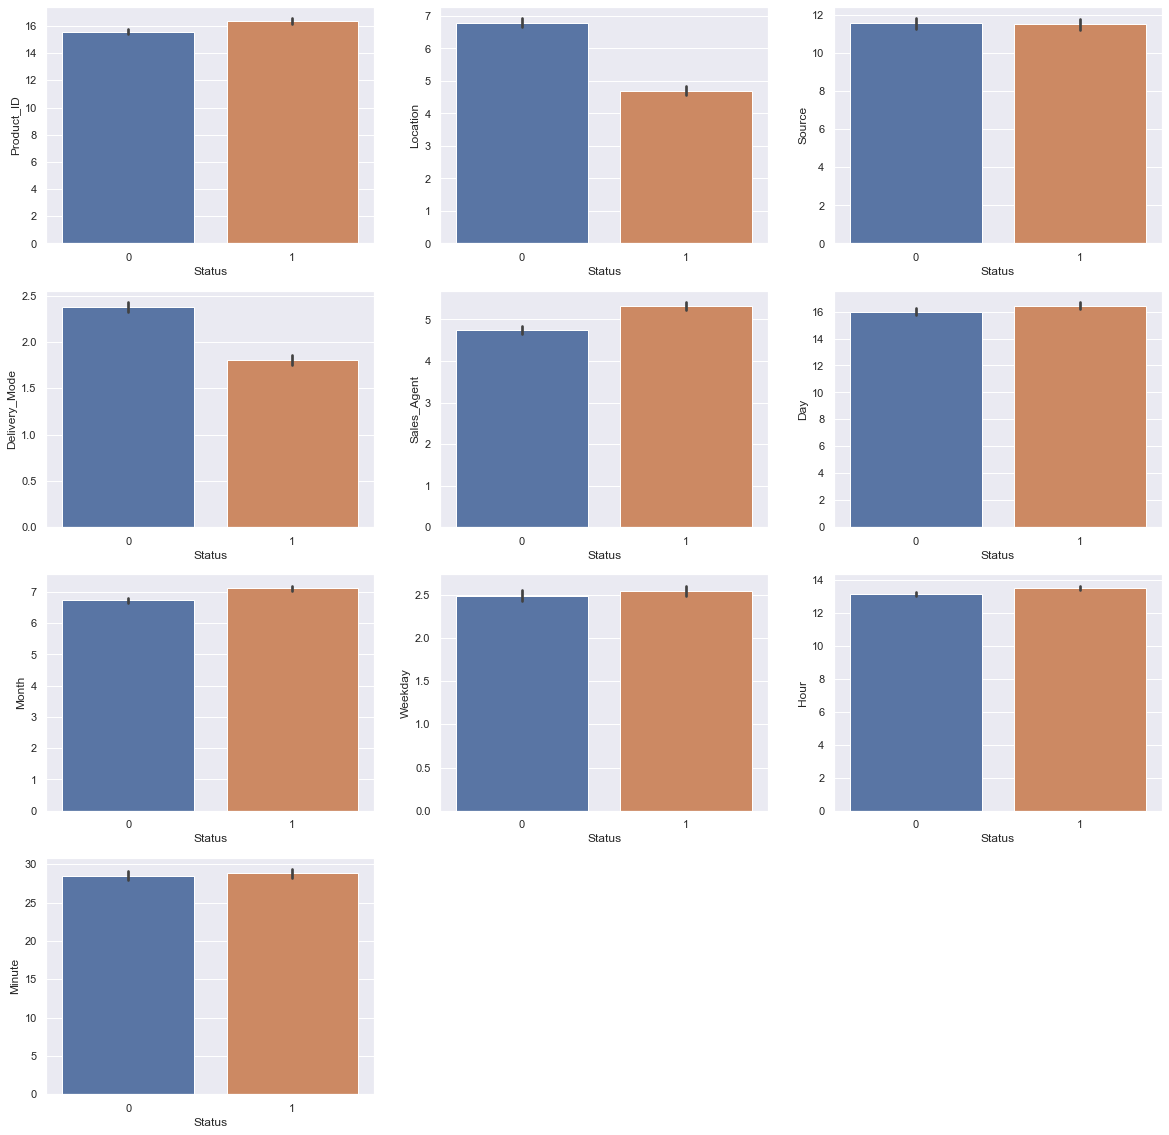

In [144]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.barplot(x=data['Status'],y=data['Product_ID'])
plt.subplot(4,3,2)
sb.barplot(x=data['Status'],y=data['Location'])
plt.subplot(4,3,3)
sb.barplot(x=data['Status'],y=data['Source'])
plt.subplot(4,3,4)
sb.barplot(x=data['Status'],y=data['Delivery_Mode'])
plt.subplot(4,3,5)
sb.barplot(x=data['Status'],y=data['Sales_Agent'])
plt.subplot(4,3,6)
sb.barplot(x=data['Status'],y=data['Day'])
plt.subplot(4,3,7)
sb.barplot(x=data['Status'],y=data['Month'])
plt.subplot(4,3,8)
sb.barplot(x=data['Status'],y=data['Weekday'])
plt.subplot(4,3,9)
sb.barplot(x=data['Status'],y=data['Hour'])
plt.subplot(4,3,10)
sb.barplot(x=data['Status'],y=data['Minute'])

plt.show()

<AxesSubplot:>

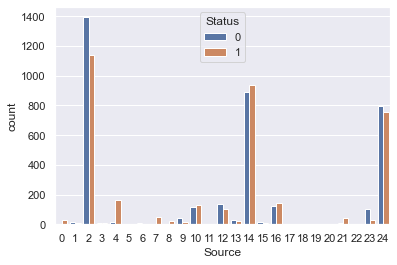

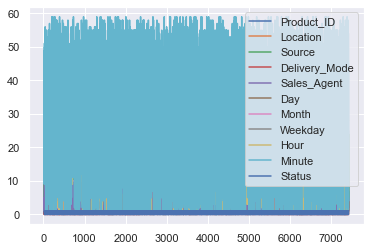

In [145]:
sb.countplot(x='Source',hue='Status',data=data)
data.plot()

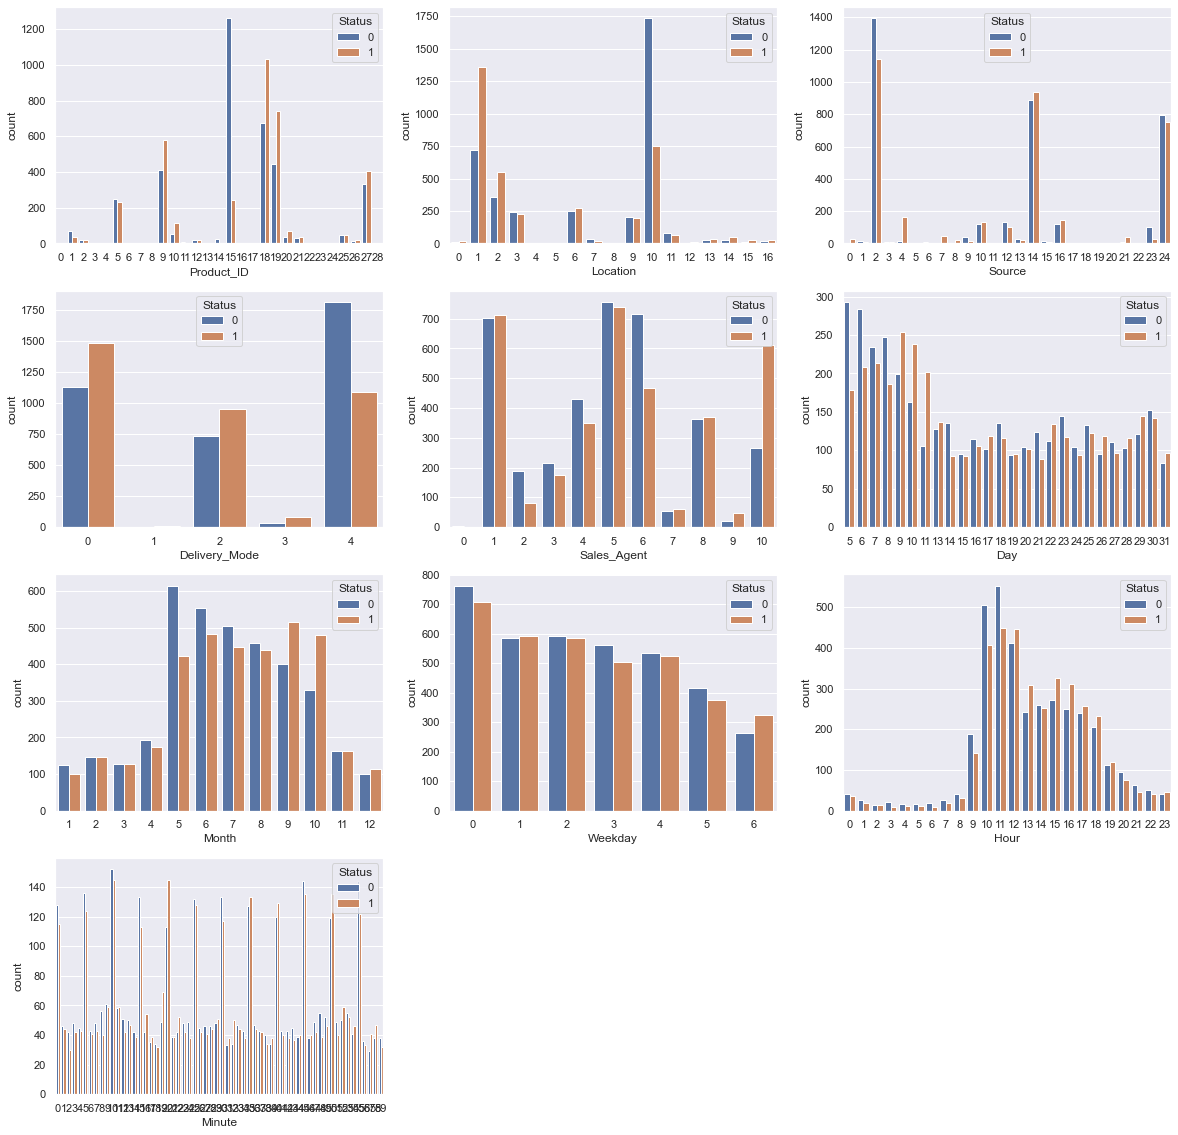

In [146]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.countplot(x='Product_ID',hue='Status',data=data)
plt.subplot(4,3,2)
sb.countplot(x='Location',hue='Status',data=data)
plt.subplot(4,3,3)
sb.countplot(x='Source',hue='Status',data=data)
plt.subplot(4,3,4)
sb.countplot(x='Delivery_Mode',hue='Status',data=data)
plt.subplot(4,3,5)
sb.countplot(x='Sales_Agent',hue='Status',data=data)
plt.subplot(4,3,6)
sb.countplot(x='Day',hue='Status',data=data)
plt.subplot(4,3,7)
sb.countplot(x='Month',hue='Status',data=data)
plt.subplot(4,3,8)
sb.countplot(x='Weekday',hue='Status',data=data)
plt.subplot(4,3,9)
sb.countplot(x='Hour',hue='Status',data=data)
plt.subplot(4,3,10)
sb.countplot(x='Minute',hue='Status',data=data)

plt.show()

C:\Users\Hasanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source'>

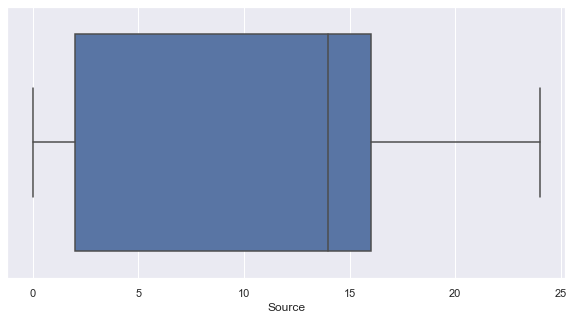

In [147]:
plt.figure(figsize=(10,5))
sb.boxplot(data['Source'])

C:\Users\Hasanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hasanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hasanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hasanthi\anac

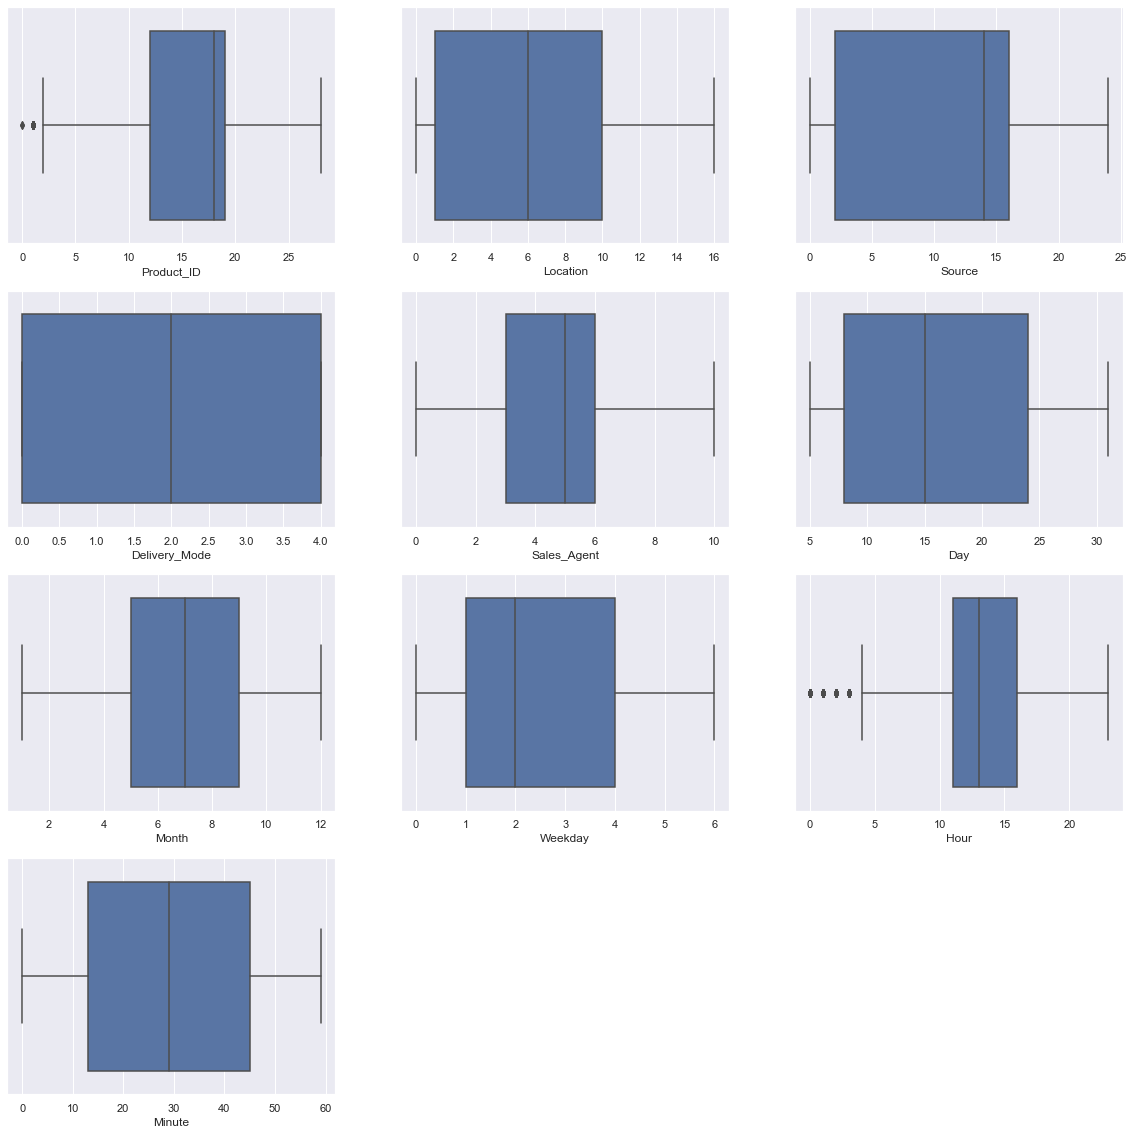

In [148]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.boxplot(data['Product_ID'])
plt.subplot(4,3,2)
sb.boxplot(data['Location'])
plt.subplot(4,3,3)
sb.boxplot(data['Source'])
plt.subplot(4,3,4)
sb.boxplot(data['Delivery_Mode'])
plt.subplot(4,3,5)
sb.boxplot(data['Sales_Agent'])
plt.subplot(4,3,6)
sb.boxplot(data['Day'])
plt.subplot(4,3,7)
sb.boxplot(data['Month'])
plt.subplot(4,3,8)
sb.boxplot(data['Weekday'])
plt.subplot(4,3,9)
sb.boxplot(data['Hour'])
plt.subplot(4,3,10)
sb.boxplot(data['Minute'])

plt.show()

In [149]:
# Model Creation

In [150]:
#Logistic Regression, KNN, Decision Tree,Random Forest, SVM,XGBoost,AdaBoosting,Naive bayes,NN

In [151]:
# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [153]:
x=data.iloc[:,:-1]
y=data.Status

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [155]:
y.head()

18    1
19    1
24    1
25    0
26    1
Name: Status, dtype: int64

In [156]:
#check the performance accuracy,precision,recall,specificity  from confusion matrix

In [157]:
def performance(cm):
    a,b,c,d=cm.ravel()           #2 classifier....2x2=4
    accuracy=(a+d)/cm.sum()      
    precision=d/(d+b)            #PPV , 1-FDR                             fdr-false discovery r
    recall=d/(d+c)               #sensitivity, TPR , hit rate, 1-FNR      fnr-miss rate
    specificity=a/(a+b)          #selectivity, TNR ,1-FPR                 fpr-fall out
    F1_score=(2*precision*recall)/(precision+recall)       # HM of precision and recall
    print('Accuracy=',accuracy)
    print('Precision=',precision)
    print('Recall=',recall)
    print('Specificity=',specificity)
    print('F1-Score=',F1_score)

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [159]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [160]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.6418826739427013
Precision= 0.6281690140845071
Recall= 0.6308345120226309
Specificity= 0.6521739130434783
F1-Score= 0.629498941425547


In [161]:
#KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [163]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1
25,15,6,24,0,8,13,11,1,16,49,0
26,18,1,2,0,8,13,11,1,16,37,1


In [164]:
x=data.iloc[:,[1,2,3,4]]
y=data.Status

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [166]:
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')

In [167]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [168]:
y_pred=model.predict(x_test)

In [169]:
cm=confusion_matrix(y_test,y_pred)

In [170]:
performance(cm)

Accuracy= 0.6161891768985903
Precision= 0.5983606557377049
Recall= 0.619811320754717
Specificity= 0.6128182616330115
F1-Score= 0.6088971269694162


In [171]:
# Decesion Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz     #to visualize
from IPython.display import Image                                   #to show in image
import pydotplus                                                    #to visualize as well
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.externals.six import StringIO

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [184]:

from sklearn.tree import DecisionTreeClassifier,export_graphviz     #to visualize
from IPython.display import Image                                   #to show in image
                                                  #to visualize as well
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [180]:
data.head(3)

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1


In [176]:
model=DecisionTreeClassifier( max_depth=4)

In [177]:
#to visualize tree as image
node_data=StringIO()
export_graphviz(model,out_file=node_data,filled=True,rounded=True,feature_names=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Day','Month','Weekday','Hour','Minute'],class_names=['0','1'])
node_data.getvalue()
graph=pydotplus.graph_from_dot_data(node_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined

In [185]:
#test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [186]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [187]:
y_pred=model.predict(x_test)

In [188]:
cm=confusion_matrix(y_test,y_pred)

In [189]:
performance(cm)

Accuracy= 0.6343792633015006
Precision= 0.5824493731918997
Recall= 0.8543140028288543
Specificity= 0.4295125164690382
F1-Score= 0.6926605504587154


In [190]:
# Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split#,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [192]:
data.head(3)


,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1


In [193]:
x=data.iloc[:,:-1]

In [194]:
y=data.Status

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [196]:
model=RandomForestClassifier(n_estimators=40,random_state=42)

In [197]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

In [198]:
y_pred=model.predict(x_test)

In [199]:
cm=confusion_matrix(y_test,y_pred)

In [200]:
performance(cm)

Accuracy= 0.6616643929058663
Precision= 0.6467315716272601
Recall= 0.6577086280056577
Specificity= 0.6653491436100132
F1-Score= 0.6521739130434783


In [201]:
#SVM

In [202]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [203]:
x=scale(x)

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [205]:
model=SVC(kernel='rbf',C=10, gamma=0.8)

In [206]:
model.fit(x_train,y_train)

SVC(C=10, gamma=0.8)

In [207]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.616643929058663
Precision= 0.5945945945945946
Recall= 0.6433962264150943
Specificity= 0.591747146619842
F1-Score= 0.6180335296782963


In [208]:
# Neural Network

In [212]:
from sklearn.neural_network import MLPClassifier

In [209]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.616643929058663
Precision= 0.5945945945945946
Recall= 0.6433962264150943
Specificity= 0.591747146619842
F1-Score= 0.6180335296782963


In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [214]:
model=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=10,learning_rate_init=0.01,batch_size=50)

In [215]:
model.fit(x_train,y_train)

MLPClassifier(batch_size=50, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, random_state=10)

In [216]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.6241473396998636
Precision= 0.6111111111111112
Recall= 0.6067892503536068
Specificity= 0.6403162055335968
F1-Score= 0.6089425124201562


In [217]:
#XG Boost

In [218]:
from xgboost import XGBClassifier

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [220]:
model=XGBClassifier(learning_rate=0.1,random_state=32,n_estimators=200)

In [221]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, ...)

In [222]:
y_pred=model.predict(x_test)

In [223]:
cm=confusion_matrix(y_test,y_pred)

In [224]:
performance(cm)

Accuracy= 0.6712141882673943
Precision= 0.6474442988204456
Recall= 0.6987270155586988
Specificity= 0.6455862977602108
F1-Score= 0.672108843537415
